# Stock Prediction Using Regression

In [249]:
import numpy as np
import pandas as pd
import sklearn
import pandas_datareader.data as dr
import numpy
import datetime as dt
import matplotlib.pyplot as plt

In [250]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2017, 1, 11)

df = dr.DataReader("AAPL", 'yahoo', start, end)

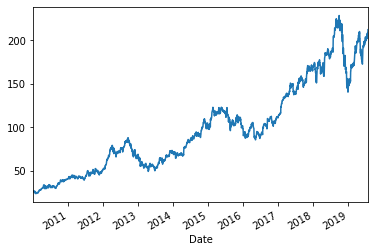

In [196]:
df["Adj Close"].plot();

## Feature Engineering

In [251]:
df['HighLowPer'] = 100 * (df['High'] - df['Low']) / df['Close']
df['ChangePer'] = 100 * (df['Close'] - df['Open']) / df['Open']
df = df.loc[:, ['HighLowPer', 'ChangePer', 'Volume', 'Adj Close']]

In [252]:
from sklearn.preprocessing import MinMaxScaler
df.describe()
df.shape

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['HighLowPer', 'ChangePer', 'Volume', 'Adj Close'])

In [253]:
leave_out = 30  # days
y = df['Adj Close'].shift(-leave_out)[0:-leave_out]
df.drop(['Adj Close'], axis = 1, inplace = True)
X = df[:-leave_out]

X_test = df[-leave_out:]



print(y.shape)
print(X.shape)



(1739,)
(1739, 3)


In [254]:
print(X_test.shape)
start = dt.datetime(2019, 8, 1)
end = dt.datetime(2019, 9, 3)

df_test = dr.DataReader("TSLA", 'yahoo', start, end)
y_test = df_test['Adj Close']

print(y_test.shape)

(30, 3)
(23,)


In [243]:
#from sklearn import preprocessing
#X = preprocessing.scale(X)



In [113]:
#testing = int(len(df)/100)
#X_test = X[-testing:]
#X_train = X[0:-testing]

#y_test = y[-testing:]
#y_train = y[:-testing]

In [114]:
#print(X_test.shape)
#print(X_train.shape)
#print(y_test.shape)
#print(y_train.shape)

(23, 3)
(2287, 3)
(23,)
(2287,)


In [255]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(X), 
                                                  np.array(y), 
                                                  test_size = 0.2)

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
pred_lin = reg_lin.predict(X_val)
r2_lin = r2_score(y_val, pred_lin)

reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)
pred_dt = reg_dt.predict(X_val)
r2_dt = r2_score(y_val, pred_dt)

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
pred_rf = reg_rf.predict(X_val)
r2_rf = r2_score(y_val, pred_rf)

/home/aitabuzaid/venv/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [258]:
print(r2_lin, r2_dt, r2_rf)

0.38191416025659974 0.24155840310006382 0.5508945779183805
